In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motionsense-dataset/data_subjects_info.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/dws_1/._sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_4.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_5.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/wlk_7/._sub_13.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_16.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_18.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_3.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_12.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_4

In [2]:
import os
import numpy as np
import pandas as pd

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = '/kaggle/input/motionsense-dataset/A_DeviceMotion_data'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)


In [3]:
data_frame

,Unnamed: 0,subject_id,session_id,category,age,gender,height,weight,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,16,1,dws,29,0,172,96,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,1,16,1,dws,29,0,172,96,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,2,16,1,dws,29,0,172,96,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,3,16,1,dws,29,0,172,96,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,4,16,1,dws,29,0,172,96,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,6859,7,7,wlk,30,0,175,62,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,6860,7,7,wlk,30,0,175,62,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,6861,7,7,wlk,30,0,175,62,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,6862,7,7,wlk,30,0,175,62,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [5]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
#df = df.sample(frac=1).reset_index(drop=True)
df

,category,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,dws,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,dws,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,dws,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,dws,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,dws,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,wlk,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,wlk,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,wlk,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,wlk,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [6]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989,0
1,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646,0
2,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598,0
3,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623,0
4,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558,5
1412861,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729,5
1412862,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601,5
1412863,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192,5


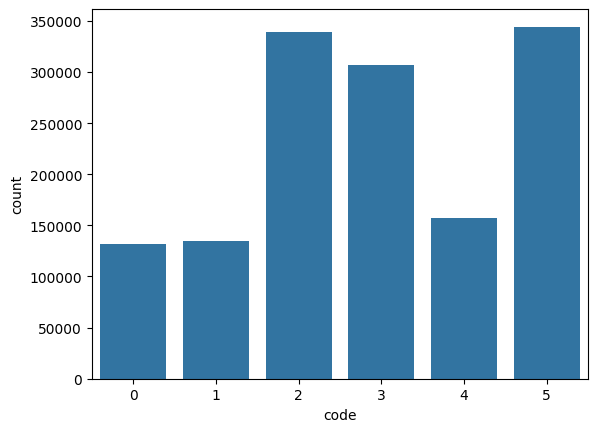

In [6]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(df, x='code')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:12]
y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [8]:
from scipy.stats import mode

WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

In [9]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

In [ ]:
vy

# Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import to_categorical

model = Sequential()	
model.add(GRU(6, input_shape=(WINDOW_LENGTH, NUM_FEATURES), return_sequences=True))	
model.add(GRU(12, return_sequences=True))  	
model.add(GRU(12)) 		
model.add(Dense(NUM_CLASSES, activation='softmax')) 	
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 150, 6)         │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 150, 12)        │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 12)             │           936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,094 (8.18 KB)

 Trainable params: 2,094 (8.18 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(tx, tty, 
                    epochs=10, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(vx, vvy))

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6167 - loss: 1.0074 - val_accuracy: 0.7056 - val_loss: 0.8068
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9424 - loss: 0.1803 - val_accuracy: 0.8397 - val_loss: 0.5313
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9694 - loss: 0.1005 - val_accuracy: 0.8311 - val_loss: 0.6021
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9778 - loss: 0.0754 - val_accuracy: 0.8756 - val_loss: 0.4996
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9820 - loss: 0.0617 - val_accuracy: 0.8609 - val_loss: 0.5488
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9851 - loss: 0.0504 - val_accuracy: 0.8386 - val_loss: 0.6411
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.8053 - val_loss: 0.7632
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9892 -

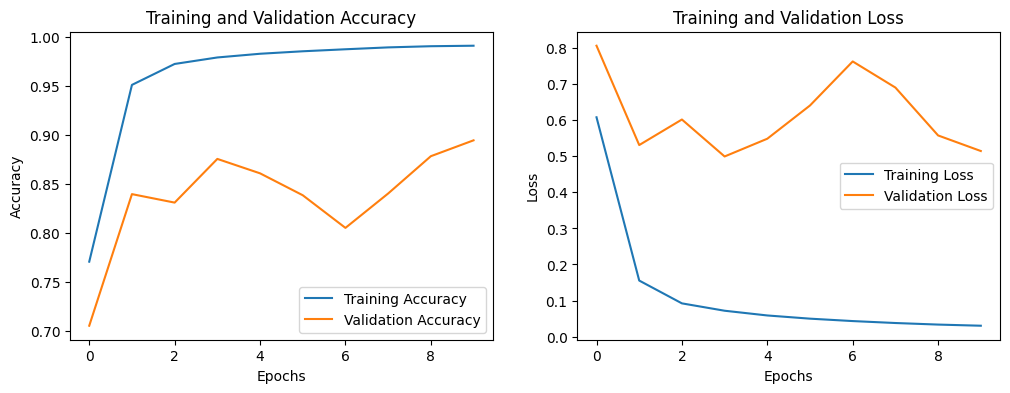

In [12]:
import matplotlib.pyplot as plt


# Extract the relevant metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9115 - loss: 0.4610


[0.514719545841217, 0.8945579528808594]

In [ ]:
# Evaluate on test data (assuming sequence_test_tensor and y_test_true are available)
y_test_predict = model.predict(vx)
y_test_predict = np.argmax(y_test_predict, axis=1)  # Convert to class labels
# Calculate accuracy
accuracy = np.sum(y_test_predict == vy)*100 / len(vy)
print('Test Accuracy = %.3f' % accuracy)

In [ ]:
def get_activity(activity_number):
    activity_mapping = {
        0: "WALKING",
        1: "WALKING_UPSTAIRS",
        2: "WALKING_DOWNSTAIRS",
        3: "SITTING",
        4: "STANDING",
        5: "JOGGING"
    }

    return activity_mapping.get(activity_number, "Invalid activity number")

In [ ]:
import numpy as np


single_sample = tx[0:1]
prediction = model.predict(single_sample)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = predicted_class[0] 
print(f'Predicted class no. : {predicted_label}')
activity = get_activity(predicted_label)
print(f"Predicted class:: {activity}")